(60000, 28, 28)
(10000, 28, 28)
GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


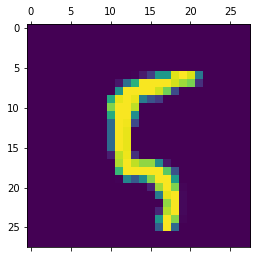

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# scale the model!!!
X_train = X_train / 255
X_test = X_test / 255

plt.matshow(X_train[100])
print(X_train.shape)
print(X_test.shape)

print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

# ANN Model

In [2]:
# flatten training dataset: from 28 x 28 to 1 x 784 array
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

# def the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28, )), # so that we don't need to flatten our data
    keras.layers.Dense(200, activation='relu'), # input layer, try 100 units
    keras.layers.Dense(10, activation='sigmoid') # hidden layer
])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) # 1 hot encoded array (also can use mean_square_error)

# train the model
model.fit(X_train_flatten, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2362 - accuracy: 0.9316
Epoch 2/8
1875/1875 [==============================] - 2s 999us/step - loss: 0.0987 - accuracy: 0.9708
Epoch 3/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0368 - accuracy: 0.9879
Epoch 6/8
1875/1875 [==============================] - 2s 997us/step - loss: 0.0293 - accuracy: 0.9906
Epoch 7/8
1875/1875 [==============================] - 2s 990us/step - loss: 0.0221 - accuracy: 0.9929
Epoch 8/8
1875/1875 [==============================] - 2s 990us/step - loss: 0.0171 - accuracy: 0.9946


In [8]:
# evaluate the model
print(model.evaluate(X_test_flatten, y_test), end="\n\n")

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

313/313 [==============================] - 0s 921us/step - loss: 0.0763 - accuracy: 0.9777
[0.07629834115505219, 0.9776999950408936]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



9


array([3.7252973e-04, 2.2794888e-05, 2.1429720e-07, 5.6418036e-03,
       2.5810073e-03, 1.0099264e-01, 2.2444326e-11, 9.3863696e-01,
       1.4392482e-01, 9.9981052e-01], dtype=float32)

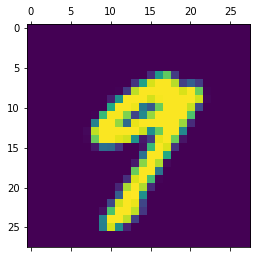

In [9]:
# predict the model
y_predicted = model.predict(X_test_flatten)

plt.matshow(X_test[20])
print(np.argmax(y_predicted[20])) # prediction
y_predicted[20]

Text(69.0, 0.5, 'Actual')

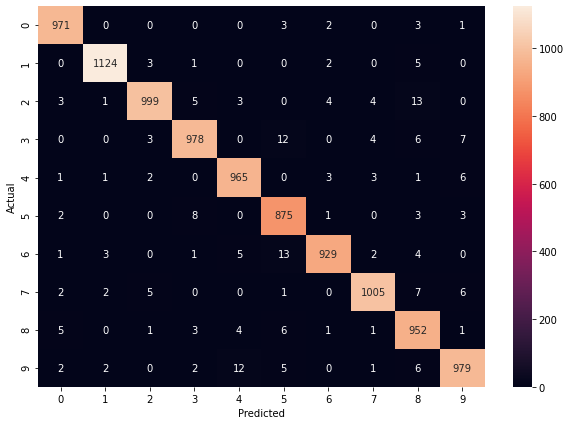

In [10]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in y_predicted])

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# CNN Model

In [26]:

X_train_flatten = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# define and train model
cnn = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)), # filter means amount of features
    keras.layers.MaxPooling2D((2, 2)), # can use average pooling as well

    keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation="relu"), 
    keras.layers.MaxPooling2D((2, 2)),

    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# in this case we don't need to one hot encode y using sparse_categorical_crossentropy (single value)


In [27]:
# train the model
cnn.fit(X_train_flatten, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.9047
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1183 - accuracy: 0.9629
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9724
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0733 - accuracy: 0.9768
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0617 - accuracy: 0.9801
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9833
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9848
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9869


In [28]:
y_pred = cnn.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.97      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

